# Debugging. Logging.

## Debugging

* print(), print() + f-strings and =
* Assert
* Logging
* IceCream etc. GitHub - gruns/icecream: 🍦 Never use print() to debug again.
* pdb debugger
* pudb debugger
* IDE embedded debuggers (PyCharm, Spyder, VS Code)

### Debugging with print()

When debugging, print() is often used to find out the value of a variable:

In [1]:
parameter = 10

print(parameter)

10


Or it is used with the addition of a variable name:

In [2]:
print("parameter =", parameter)

parameter = 10


When outputting static string values, it is better to use repr, since otherwise it is impossible to distinguish between string and numeric data:

In [3]:
a = 5
print(a)
b = '5'
print(b)
print(repr(b))

5
5
'5'


On Python 3.8+ we can use an f-string with the = specifier to achieve the same with less typing:

In [4]:
print(f'{parameter=}')

parameter=10


### Assert – checking variables when debugging and testing

https://docs-python.ru/tutorial/oshibki-iskljuchenija-python/instruktsija-assert/

```python
assert expression1, expression2 
```

This code is equivalent to the code 
```python
if __debug__: 
	if not expression1: 
		raise AssertionError(expression2) 
```

In [5]:
assert 2 + 2 == 4, "Problem no1!"
assert 2 + 2 == 5, "Problem no2!"

AssertionError: Problem no2!

Disabling warnings (disabling debug mode):

python -O script.py


assert is often used to check the input data of a function (division by zero, empty array).

But it is more appropriate to use it to create built-in unit tests:

In [8]:
def square(a):
    return a*a
    # possible wrong implementation:
    #return a**a

def qubic(a):
    return a*a*a
    # possible wrong implementation:
    #return a*a**a

def root(a):
    # correct code:
    return a**(1/2)
    # possible wrong implementation:
    #return a**(-2)


# correct test for int only:
assert square(2) == 4, "square() failed"
assert square(5) == 25, "square() failed"
assert qubic(2) == 8, "qubic() failed"
assert qubic(5) == 125, "qubic() failed"

# correct implementation for float datatypes includes allowed error:
assert abs(1 - root(2)/1.414213562373095) < 0.01, "root() failed"
assert abs(1 - root(4)/2) < 0.01, "root() failed"

'''
# wrong implementation for float datatypes:
assert root(2) == 1.414213562373095, "root() failed"
assert root(5) == 2.23606797749979, "root() failed"
'''
print("Test passed")



a = 10
print(square(a))
print(qubic(a))
print(root(a))

Test passed
100
1000
3.1622776601683795


Pay attention to the comparison of fractional numbers - you can't compare them directly, you need to explicitly set the maximum error (absolute or relative).

You can also do this using the math.isclose() function:
```python
 math.isclose(a, b, *, rel_tol=1e-09, abs_tol=0.0)
 ```
https://docs.python.org/3/library/math.html#math.isclose

### pdb debugging

pdb is a native debugger

Run:

  python -m pdb your_script.py


    n: execute the next line
    p: print the value of an object
    s: step into a function
    r: return from a function
    b [num]: set a breakpoint at line [NUM]
    c: continue to run the code until a break point is met
    unt [NUM]: run the code until line [NUM]
    whatis: print the type of object 
    l: list the context of current line (default 11 lines)
    h: show help message
    q: quit the debugger


https://jdhao.github.io/2019/01/16/debug_python_in_terminal/

Command-Line Python Debugging with pdb https://www.youtube.com/watch?v=a7qIcIaL4zs

Or insert pdb.set_trace() (or just breakpoint()) inside a function (does not work in Jupyter)

```python
# pdb_example.py
import ipdb
values = [10, 6, 17, 0, 9, 21] 
for value in values:
    breakpoint()
    print(10 / value)
    if value % 5 == 0:
        print('Divisible by 5')
    print('Hello World')
```

### Problem

Try debug (find errors and check values during running) with the next file

In [ ]:
# pdb_example.py
values = [10, 6, 17, 0, 9, 21] 
for value in values:
    print(10 / value)
    if value % 5 == 0:
        print('Divisible by 5')
    print('Hello World')

For jupyter notebooks use ipdb (Install it via - pip install ipdb) or IPython.core.debugger

(https://davidhamann.de/2017/04/22/debugging-jupyter-notebooks/)





In [10]:
# pdb_example.py
values = [10, 6, 17, 0, 9, 21] 
for value in values:
    import ipdb; ipdb.set_trace() # debugging starts here, put statement inside a function
    print(10 / value)
    if value % 5 == 0:
        print('Divisible by 5')
    print('Hello World')

> /tmp/ipykernel_9955/2897024658.py(5)<module>()
      4     import ipdb; ipdb.set_trace() # debugging starts here, put statement inside a function
----> 5     print(10 / value)
      6     if value % 5 == 0:



ipdb>  n


1.0
> /tmp/ipykernel_9955/2897024658.py(6)<module>()
      5     print(10 / value)
----> 6     if value % 5 == 0:
      7         print('Divisible by 5')



ipdb>  n


> /tmp/ipykernel_9955/2897024658.py(7)<module>()
      6     if value % 5 == 0:
----> 7         print('Divisible by 5')
      8     print('Hello World')



ipdb>  p value


10


ipdb>  l


      2 values = [10, 6, 17, 0, 9, 21]
      3 for value in values:
      4     import ipdb; ipdb.set_trace() # debugging starts here, put statement inside a function
      5     print(10 / value)
      6     if value % 5 == 0:
----> 7         print('Divisible by 5')
      8     print('Hello World')



ipdb>  q


In [11]:
# pdb_example.py
from IPython.core.debugger import set_trace

values = [10, 6, 17, 0, 9, 21] 
for value in values:
    set_trace()
    print(10 / value)
    if value % 5 == 0:
        print('Divisible by 5')
    print('Hello World')

> /tmp/ipykernel_9955/3706190132.py(7)<module>()
      5 for value in values:
      6     set_trace()
----> 7     print(10 / value)
      8     if value % 5 == 0:
      9         print('Divisible by 5')



ipdb>  n


1.0
> /tmp/ipykernel_9955/3706190132.py(8)<module>()
      6     set_trace()
      7     print(10 / value)
----> 8     if value % 5 == 0:
      9         print('Divisible by 5')
     10     print('Hello World')



ipdb>  q


### pudb debugger

First, install it with pip:
    
    pip install pudb

To invoke it, you can either use
    
    python -m pudb my.py

or simply
    
    pudb3 my.py

You can use k and j to move the cursor line up and down and use b to set a break point, which will be highlighted in red. To execute next line of code, use n. To run the code until a break point, use c. 

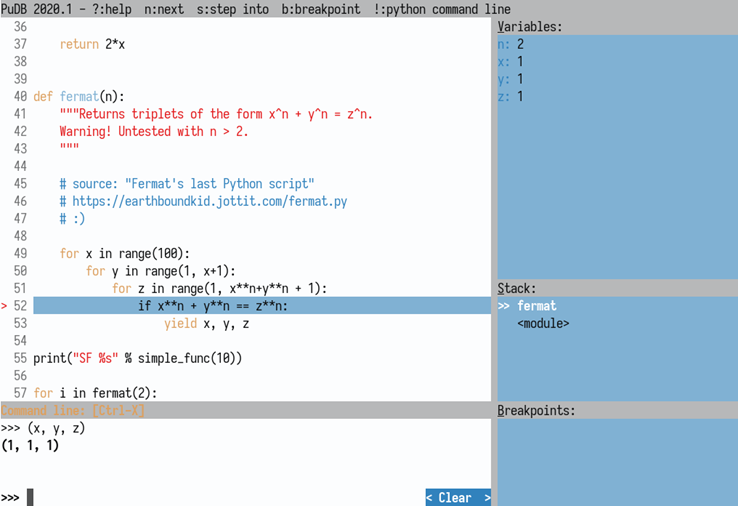

https://habr.com/ru/articles/158139/

https://github.com/inducer/pudb 

### Logging instead of print

Have you ever had trouble debugging Python code?  
If so, learning how to set up logging in Python can help you simplify your debugging tasks.

https://realpython.com/python-logging/



In [1]:
import logging
logging.debug('This is a debug message')
logging.info('This is an info message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [22]:
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [23]:
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')

DEBUG:__main__:This is a debug message
INFO:__main__:This is an info message
ERROR:__main__:This is an error message
CRITICAL:__main__:This is a critical message


In [25]:
logger.setLevel(logging.WARNING)

In [26]:
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')

ERROR:__main__:This is an error message
CRITICAL:__main__:This is a critical message


In [27]:
logger.setLevel(logging.CRITICAL)

In [28]:
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')

CRITICAL:__main__:This is a critical message


In [38]:
file_handler = logging.FileHandler("app.log", mode="a", encoding="utf-8")
logger.addHandler(file_handler) # https://realpython.com/python-logging/
logger.setLevel(logging.WARNING)
logger.warning('This will get logged to a file')

## Testing

PyTest and unittests are frameworks for testing Python code.

"PyTest offers a simpler and more intuitive syntax for writing tests, making it more accessible to new developers."

"unittests is the standard testing module in Python and may be more convenient to use in projects that follow Python standards."

https://pythonworld.ru/moduli/modul-unittest.html